<center>
    
<h2>BÀI TẬP MÔN HỌC </h2>
    
</center>
 
---
**Thông tin sinh viên:**
1. Họ tên SV: Phạm Anh Tuấn
2. Mã Sinh viên: 2121050107
3. Lớp: DCCTKH66
4. Nhóm môn học: 05



---

**Mô tả tập dữ liệu:**

Tập dữ liệu Data_Practice_ML.xlsx chứa dữ liệu của các bệnh nhân bị u vú. (chi tiết trong slide bài giảng)

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 8 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Sex: Thuộc tính cho biết giới tính bệnh nhân
3. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số
4. Weight: Thuộc tính cho biết cân nặng của bệnh nhân (Kg)
5. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
6. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
7. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
8. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)
 

## PHẦN I: CHUẨN BỊ DỮ LIỆU
---

**Yêu cầu 1:**
Đọc tập dữ liệu Data_Practice_ML.xlsx vào biến DataFrame,
- Hiển thị thông tin của biến,
- Hiển thị dữ liệu 5 bản ghi đầu tiên; 5 bản ghi cuối cùng, 5 bản ghi ngẫu nhiên
- Thống kê dữ liệu các thuộc tính số, các thuộc tính Object; đưa ra các nhận xét về dữ liệu; Có thể sử dụng các biểu đồ để thể hiện trực quan

In [1]:
import pandas as pd

df_practice = pd.read_excel("Data\Data_Practice_ML.xlsx")

print("Hiển thị thông tin biến")
df_practice.info()

Hiển thị thông tin biến
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Sex        961 non-null    object 
 2   Age        956 non-null    float64
 3   Weight     961 non-null    int64  
 4   Shape      930 non-null    object 
 5   Margin     913 non-null    object 
 6   Density    885 non-null    object 
 7   Target     961 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 60.2+ KB


In [2]:
print("Hiển thị 5 bản ghi đầu tiên")

df_practice.head(5)

Hiển thị 5 bản ghi đầu tiên


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,Female,67.0,46,Lobular,Spiculated,Low,1
1,P2,Female,43.0,66,Round,Circumscribed,NaN,1
2,P3,Female,58.0,80,Irregular,Spiculated,Low,1
3,P4,Female,28.0,51,Round,Circumscribed,Low,0
4,P5,Female,74.0,46,Round,Spiculated,NaN,1


In [3]:
print("HIển thị 5 bản ghi cuối")

df_practice.tail(5)

HIển thị 5 bản ghi cuối


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
956,P957,Female,47.0,72,Oval,Circumscribed,Low,0
957,P958,Female,56.0,64,Irregular,Spiculated,Low,1
958,P959,Female,64.0,75,Irregular,Spiculated,Low,0
959,P960,Female,66.0,56,Irregular,Spiculated,Low,1
960,P961,Female,62.0,51,Lobular,Obscured,Low,0


In [4]:
print("Hiển thị 5 bản ghi ngẫu nhiên")

df_practice.sample(5)

Hiển thị 5 bản ghi ngẫu nhiên


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
11,P12,Female,42.0,53,Oval,Circumscribed,Low,1
941,P942,Female,58.0,63,Irregular,Obscured,Low,0
401,P402,Female,68.0,57,Irregular,ill-defined,Low,1
891,P892,Female,42.0,55,Round,Circumscribed,High,1
859,P860,Female,76.0,73,Oval,Spiculated,Low,1


In [5]:
print("Thống kê dữ liệu các thuộc tính số")

df_practice.describe()

Thống kê dữ liệu các thuộc tính số


,Age,Weight,Target
count,956.000000,961.000000,961.000000
mean,56.306485,62.609781,0.463059
std,30.044212,10.440240,0.498893
min,18.000000,45.000000,0.000000
25%,45.000000,53.000000,0.000000
50%,57.000000,62.000000,0.000000
75%,66.000000,71.000000,1.000000
max,870.000000,80.000000,1.000000


In [6]:
print("Thống kê các thuộc tính Object") #Số lượng các đối tượng
df_practice.describe(include="O")

Thống kê các thuộc tính Object


,PatientID,Sex,Shape,Margin,Density
count,961,961,930,913,885
unique,961,2,5,6,5
top,P1,Female,Irregular,Circumscribed,Low
freq,1,960,399,357,797


In [7]:
print("Nhận xét về dữ liệu")
print("Những nhóm người có thể mắc bệnh u vú")
print("__________")

print("Giới tính")
print(df_practice["Sex"].value_counts())
print("Nhận xét: Giới tính có nguy cơ mắc u vú cao nhất là ", df_practice["Sex"].value_counts().idxmax())

print("__________")
print("Độ tuổi")
print(df_practice["Age"].value_counts())
print("Nhận xét: Độ tuổi có nguy cơ mắc u vú cao nhất là ",df_practice["Age"].value_counts().idxmax(), "tuổi")

error_age = 870
df_practice["Age"] = df_practice["Age"].replace(error_age,float('nan'))
# Trong Age có giá trị tuổi = 870, thay thế bằng NaN

print("__________")
print("Cân nặng")
print(df_practice["Weight"].value_counts())
print("Nhận xét: Cân nặng có nguy cơ mắc u vú cao nhất là ",df_practice["Weight"].value_counts().idxmax(), "kg")




Nhận xét về dữ liệu
Những nhóm người có thể mắc bệnh u vú
__________
Giới tính
Female    960
FEMALE      1
Name: Sex, dtype: int64
Nhận xét: Giới tính có nguy cơ mắc u vú cao nhất là  Female
__________
Độ tuổi
59.0     36
67.0     32
57.0     32
66.0     31
46.0     28
         ..
870.0     1
82.0      1
18.0      1
88.0      1
20.0      1
Name: Age, Length: 74, dtype: int64
Nhận xét: Độ tuổi có nguy cơ mắc u vú cao nhất là  59.0 tuổi
__________
Cân nặng
49    40
80    38
69    36
61    36
57    35
51    34
70    33
53    32
50    31
65    31
68    30
46    30
78    28
58    28
77    28
75    26
73    26
63    26
79    26
48    26
56    25
74    25
59    25
62    25
54    25
72    22
66    22
60    21
67    21
76    21
64    20
52    19
47    18
71    18
55    17
45    17
Name: Weight, dtype: int64
Nhận xét: Cân nặng có nguy cơ mắc u vú cao nhất là  49 kg


59.0    36
67.0    32
57.0    32
66.0    31
46.0    28
        ..
18.0     1
82.0     1
93.0     1
96.0     1
20.0     1
Name: Age, Length: 73, dtype: int64


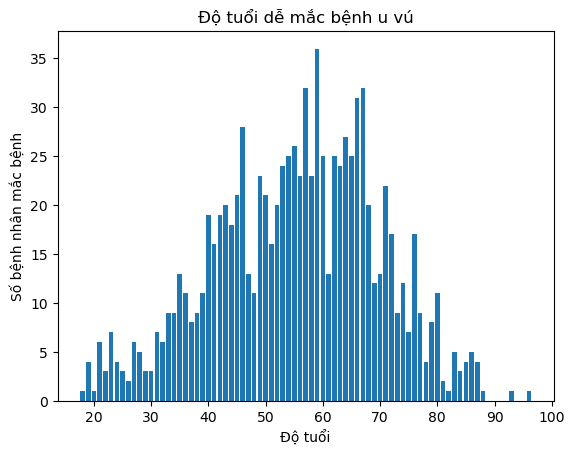

In [8]:
#Biểu đồ trực quan hóa độ tuổi dễ mắc bệnh
import matplotlib.pyplot as plt

age = df_practice['Age'].value_counts()
print(age)


plt.bar(age.index, age.values)

plt.title("Độ tuổi dễ mắc bệnh u vú")
plt.xlabel("Độ tuổi")
plt.ylabel("Số bệnh nhân mắc bệnh")

plt.show()


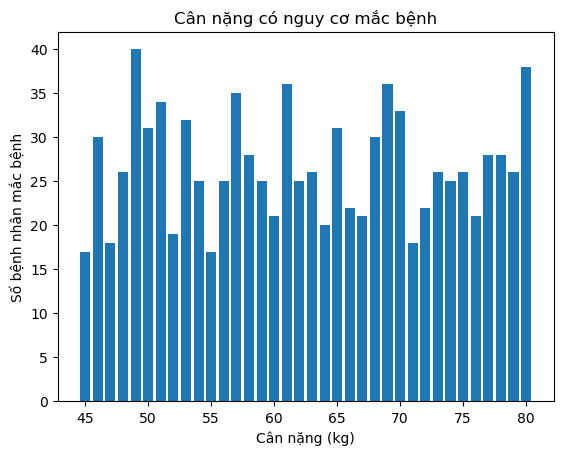

In [9]:
weight = df_practice["Weight"].value_counts()

plt.bar(weight.index, weight.values)

plt.xlabel("Cân nặng (kg)")
plt.ylabel("Số bệnh nhân mắc bệnh")
plt.title("Cân nặng có nguy cơ mắc bệnh")

plt.show()

**Yêu cầu 2:**

- Kiểm tra các bản ghi trùng lặp, các thông số bất thường trong tập dữ liệu nếu có
- Thống kê dữ liệu thiếu (missing) cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

In [10]:
#Hiển thị bản ghi trùng lặp
print(df_practice[(df_practice.duplicated()==True)])
print("_________________")
#Kiểm tra dữ liệu thiếu(missing)

missing_counts = df_practice.isna().sum()
print("Số lượng giá trị thiếu cho từng thuộc tính: ")
print(missing_counts)
print("__________")

# Liệt kê các bản ghi bị thiếu tương ứng với từng thuộc tính
for column in df_practice.columns:
    missing_records = df_practice[df_practice[column].isnull()]
    if not missing_records.empty:
        print(f"Các bản ghi bị thiếu cho thuộc tính '{column}':")
        print(missing_records)




Empty DataFrame
Columns: [PatientID, Sex, Age, Weight, Shape, Margin, Density, Target]
Index: []
_________________
Số lượng giá trị thiếu cho từng thuộc tính: 
PatientID     0
Sex           0
Age           6
Weight        0
Shape        31
Margin       48
Density      76
Target        0
dtype: int64
__________
Các bản ghi bị thiếu cho thuộc tính 'Age':
    PatientID     Sex  Age  Weight      Shape       Margin Density  Target
165      P166  Female  NaN      73  Irregular   Spiculated     Low       1
443      P444  Female  NaN      48  Irregular   Spiculated     Low       1
453      P454  Female  NaN      64  Irregular  ill-defined     Low       1
683      P684  Female  NaN      53    Lobular     Obscured     Low       1
884      P885  Female  NaN      75  Irregular  ill-defined     Low       1
923      P924  Female  NaN      51  Irregular     Obscured     Low       1
Các bản ghi bị thiếu cho thuộc tính 'Shape':
    PatientID     Sex   Age  Weight Shape         Margin         Density  \

In [11]:
#Thay thế missing trong Shape

df_practice["Shape"].fillna("Irregular", inplace=True)
df_practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Sex        961 non-null    object 
 2   Age        955 non-null    float64
 3   Weight     961 non-null    int64  
 4   Shape      961 non-null    object 
 5   Margin     913 non-null    object 
 6   Density    885 non-null    object 
 7   Target     961 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 60.2+ KB


In [12]:
#Thay thế missing trong Margin
df_practice['Margin'].value_counts()

df_practice["Margin"].fillna("Circumscribed", inplace=True)
df_practice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Sex        961 non-null    object 
 2   Age        955 non-null    float64
 3   Weight     961 non-null    int64  
 4   Shape      961 non-null    object 
 5   Margin     961 non-null    object 
 6   Density    885 non-null    object 
 7   Target     961 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 60.2+ KB


In [13]:
#Thay thế dữ liệu missing của Age = mean (Giá trị trung bình)
mean_age = df_practice['Age'].mean()
df_practice['Age'].fillna(mean_age, inplace=True)
print('Dữ liệu Missing ở Age sau khi xử lý còn lại là: ')
df_practice['Age'].isnull().sum()

Dữ liệu Missing ở Age sau khi xử lý còn lại là: 


0

In [14]:
#Thay thế missing trong Density
df_practice['Density'].value_counts()

df_practice["Density"].fillna("Low", inplace=True)
df_practice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Sex        961 non-null    object 
 2   Age        961 non-null    float64
 3   Weight     961 non-null    int64  
 4   Shape      961 non-null    object 
 5   Margin     961 non-null    object 
 6   Density    961 non-null    object 
 7   Target     961 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 60.2+ KB


**Yêu cầu 3:** 

- Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target]
- Xác định thuộc tính quan trọng, không quan trọng ảnh hưởng việc u lành tính hay ác tính của bệnh nhân

0    516
1    445
Name: Target, dtype: int64


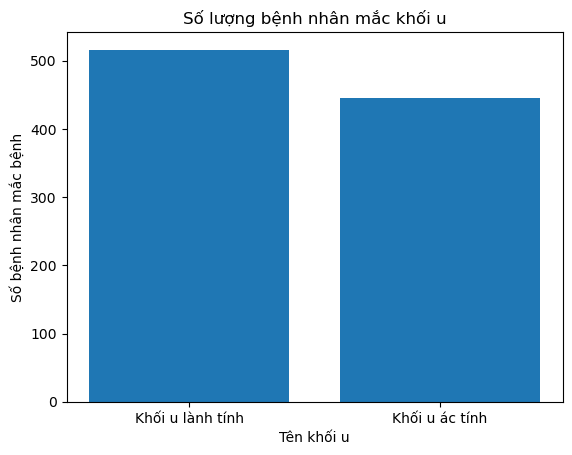

In [238]:
#Target thuộc tính cho biết khối u lành tính (0) hay u ác tính (1)

#Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số
#Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
#Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
#Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing

print(df_practice["Target"].value_counts())

target = df_practice["Target"].value_counts()

name = ["Khối u lành tính", "Khối u ác tính"]

plt.bar(name, target.values)

plt.xlabel("Tên khối u")
plt.ylabel("Số bệnh nhân mắc bệnh")
plt.title("Số lượng bệnh nhân mắc khối u")
plt.show()



        count       mean        std   min    25%   50%    75%   max
Target                                                             
0       516.0  49.713178  13.636441  18.0  40.75  50.0  59.25  86.0
1       445.0  62.111745  12.261096  28.0  54.00  63.0  71.00  96.0


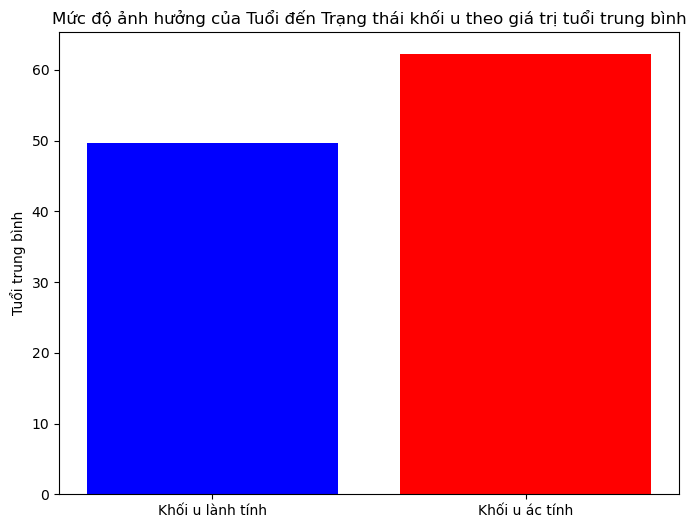

In [239]:

age_target_summary = df_practice.groupby('Target')['Age'].describe()
print(age_target_summary)

#Count: Số bệnh nhân mắc u 
#Độ tuổi trung bình
#Đô lệch chuẩn
#Độ tuổi nhỏ nhất mắc u
#25%
#50%
#75%
#Max: Độ tuổi lớn nhất mắc u

targets = ['Khối u lành tính', 'Khối u ác tính']
mean_age = [49.71, 62.20]  # Giá trị trung bình của Age cho mỗi nhóm Target

plt.figure(figsize=(8, 6)) #dài / rộng của biểu đồ

plt.bar(targets, mean_age, color=['blue', 'red'])
plt.ylabel('Tuổi trung bình')
plt.title('Mức độ ảnh hưởng của Tuổi đến Trạng thái khối u theo giá trị tuổi trung bình')

plt.show()


# Nhận xét ảnh hưởng của tuổi đến U: 
- Dựa vào bảng thống kê và biểu đồ trực quan hóa ta có thể thấy độ tuổi có ảnh hưởng lớn đến sự xuất hiện của U lành tính hay U ác tính.
- Có ảnh hưởng đáng kể đến sự xuất hiện của u ác tính từ đó cho thấy những người cao tuổi có khả năng mắc bệnh ác tính nhiều hơn những người trẻ


       count unique        top freq
Target                             
0        516      5      Round  186
1        445      4  Irregular  327


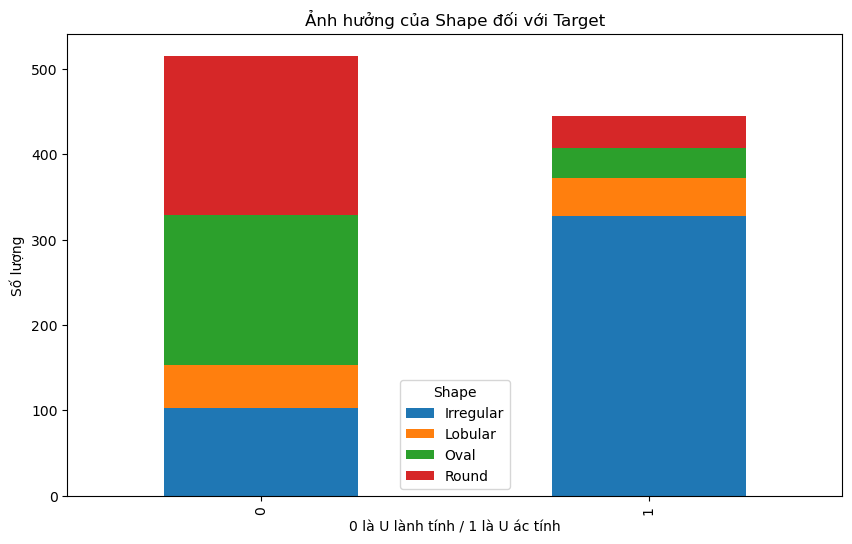

In [240]:
#Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular

# Tạo Data chứa số lượng mẫu cho mỗi nhóm Target và Shape
shape_target_summary = df_practice.groupby('Target')['Shape'].describe()

print(shape_target_summary)

#Xóa dữ liệu bị sai trong cột Shape
df_practice = df_practice[df_practice['Shape'] != 'IRREGULAR']

target_shape_counts = df_practice.groupby(['Target', 'Shape']).size().unstack(fill_value=0)

#groupby() Lấy dữ liệu từ 2 thuộc tính
#unstack chuyển dữ liệu từ chuỗi sang bảng 
#fill_value thay thế giá trị thiếu = 0


target_shape_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.title('Ảnh hưởng của Shape đối với Target')
plt.xlabel('0 là U lành tính / 1 là U ác tính')
plt.ylabel('Số lượng')


plt.legend(title='Shape')

# Hiển thị biểu đồ
plt.show()




# Nhận xét: Thuộc tính khối u không ảnh hưởng nhiều đến việc u là lành tính hay ác tính

       count unique            top freq
Target                                 
0        515      5  Circumscribed  353
1        445      5    ill-defined  191


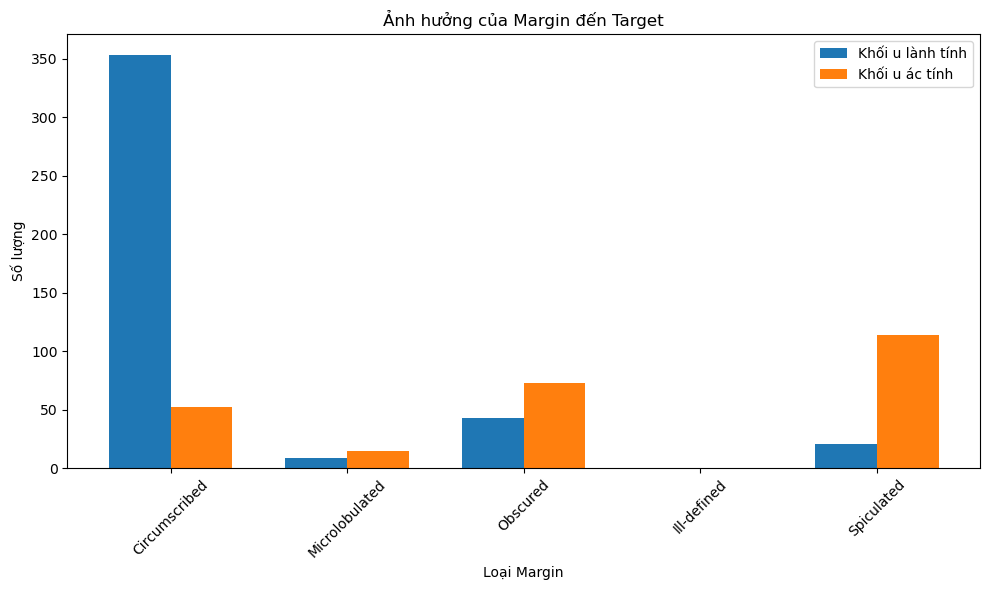

In [241]:
margin_target = df_practice.groupby('Target')['Margin'].describe()

print(margin_target)



margin_values = ['Circumscribed', 'Microlobulated', 'Obscured', 'Ill-defined', 'Spiculated']
target_0_counts = [df_practice[df_practice['Target'] == 0]['Margin'].value_counts().get(margin, 0) for margin in margin_values]
target_1_counts = [df_practice[df_practice['Target'] == 1]['Margin'].value_counts().get(margin, 0) for margin in margin_values]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(margin_values))
plt.bar(index, target_0_counts, bar_width, label='Khối u lành tính')
plt.bar([i + bar_width for i in index], target_1_counts, bar_width, label='Khối u ác tính')
plt.xlabel('Loại Margin')
plt.ylabel('Số lượng')
plt.title('Ảnh hưởng của Margin đến Target')
plt.xticks([i + bar_width/2 for i in index], margin_values, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Nhận xét: Đường biên của khối u ảnh hưởng nhiều đến việc U là lành hay dữ tính

       count unique  top freq
Target                       
0        515      4  Low  458
1        445      4  Low  415


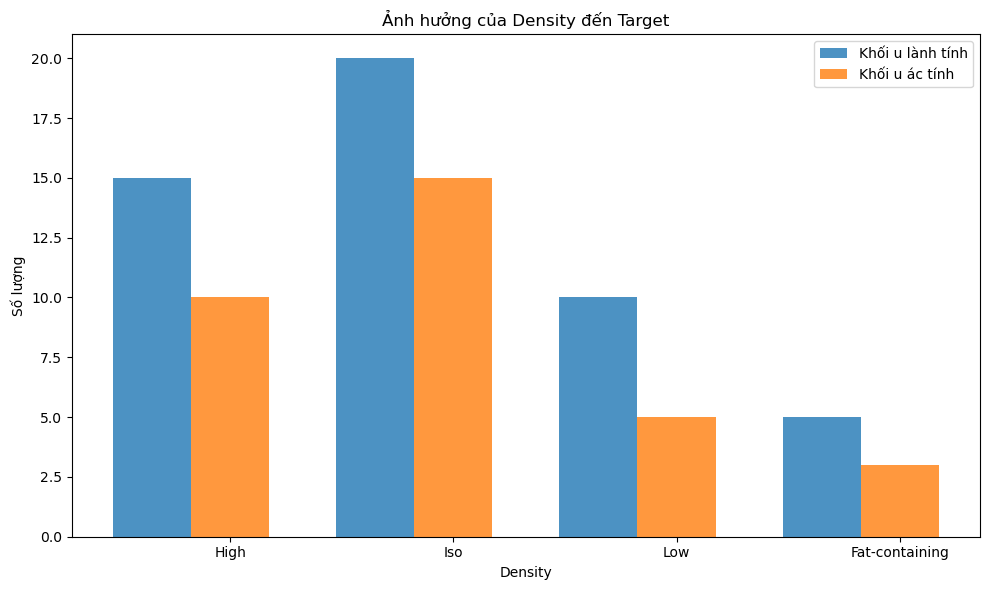

In [242]:
#Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
density_target = df_practice.groupby('Target')['Density'].describe()

print(density_target)


density_values = ['High', 'Iso', 'Low', 'Fat-containing']  # Các giá trị của Density
target_labels = ['Khối u lành tính', 'Khối u ác tính']  # Nhãn của các nhóm Target
density_counts = [[15, 20, 10, 5], [10, 15, 5, 3]]  # Số lượng của mỗi giá trị Density cho mỗi nhóm Target

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho mỗi giá trị Density trong từng nhóm Target
bar_width = 0.35
opacity = 0.8
index = range(len(density_values))

for i, target_count in enumerate(density_counts):
    plt.bar([x + i * bar_width for x in index], target_count, bar_width, alpha=opacity, label=target_labels[i])

plt.xlabel('Density')
plt.ylabel('Số lượng')
plt.title('Ảnh hưởng của Density đến Target')
plt.xticks([x + bar_width for x in index], density_values)
plt.legend()
plt.tight_layout()
plt.show()



# Nhận xét: Mật độ (Density): Mức độ ảnh hưởng của mật độ đến Target không thể xác định rõ ràng, vì cả hai nhóm Target đều có phân phối tương tự đối với thuộc tính này.

# Nhận xét:
- Tuổi tác là thuộc tính có ảnh hưởng lớn nhất đến việc xác định khối u lành tính or u ác tính
- Điều này có thể được sử dụng để đưa ra dự đoán về tính chất của khối u dựa trên tuổi của bệnh nhân.
- Mật độ ( Density) là thuộc tính không thể dùng để xác định khối u 


**Yêu cầu 4:** 
- Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy
- Lưu kết quả dữ liệu sau xử lý ra file Data_Practice_ML_OK.csv

In [243]:
#Chuyển tuổi sang số nguyên (int)

df_practice['Age'] = df_practice['Age'].astype(int)
df_practice.head()

,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,Female,67,46,Lobular,Spiculated,Low,1
1,P2,Female,43,66,Round,Circumscribed,Low,1
2,P3,Female,58,80,Irregular,Spiculated,Low,1
3,P4,Female,28,51,Round,Circumscribed,Low,0
4,P5,Female,74,46,Round,Spiculated,Low,1


In [244]:
# Thay thế giá trị 'Female' thành 0 và giá trị 'Male' thành 1
df_practice['Sex'] = df_practice['Sex'].map({'Female': 0, 'Male': 1})
df_practice.head()


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,0,67,46,Lobular,Spiculated,Low,1
1,P2,0,43,66,Round,Circumscribed,Low,1
2,P3,0,58,80,Irregular,Spiculated,Low,1
3,P4,0,28,51,Round,Circumscribed,Low,0
4,P5,0,74,46,Round,Spiculated,Low,1


In [245]:
#Chuyển các giá trị trong Shape thành số nguyên
# Thay thế các giá trị:
#'Lobular' = 0 , 'Round' = 1, 'Irregular' = 2, 'Oval ' = 3
df_practice['Shape'] = df_practice['Shape'].map({'Lobular': 0, 
                                                 'Round': 1, 
                                                 'Irregular': 2, 
                                                 'Oval': 3})

df_practice.head()



,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,0,67,46,0,Spiculated,Low,1
1,P2,0,43,66,1,Circumscribed,Low,1
2,P3,0,58,80,2,Spiculated,Low,1
3,P4,0,28,51,1,Circumscribed,Low,0
4,P5,0,74,46,1,Spiculated,Low,1


In [246]:
#Chuyển các giá trị trong Margin thành số nguyên
#Thay thế các giá trị:
#Circumscribed = 0, Microlobulated = 1, Obscured = 2, ill-defined = 3, Spiculated=4

df_practice["Margin"] = df_practice["Margin"].map({'Circumscribed': 0,
                                                  'Microlobulated':1,
                                                  'Obscured':2,
                                                  'ill-defined':3,
                                                  'Spiculated':4})
df_practice.head()

,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,0,67,46,0,4,Low,1
1,P2,0,43,66,1,0,Low,1
2,P3,0,58,80,2,4,Low,1
3,P4,0,28,51,1,0,Low,0
4,P5,0,74,46,1,4,Low,1


In [247]:
#Thay thế các giá trị Density bằng số nguyên
#Thay thế các giá trị:
#High = 0, ISO = 1, Low = 2, Fat - containing =3

df_practice["Density"] = df_practice["Density"].map({'High':0,
                                                    'ISO':1,
                                                    'Low':2,
                                                    'Fat-containing':3})



df_practice.head()

,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,0,67,46,0,4,2.0,1
1,P2,0,43,66,1,0,2.0,1
2,P3,0,58,80,2,4,2.0,1
3,P4,0,28,51,1,0,2.0,0
4,P5,0,74,46,1,4,2.0,1


In [248]:

#Lưu file kết quả chuẩn bị dữ liệu:
#Excel
df_practice.to_excel('Data_Practice_OK.xlsx',index=None)


0    515
1    445
Name: Target, dtype: int64


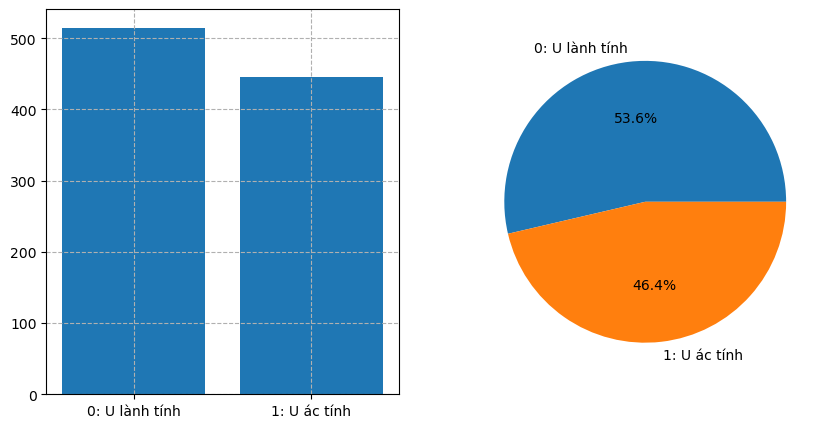

In [249]:
#Kiểm tra cân bằng dữ liệu
check = df_practice["Target"].value_counts()
print(check)

#Trực quan hóa dữ liệu
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) #Biểu đồ cột
plt.bar(["0: U lành tính", "1: U ác tính"],
       check.values)
plt.grid(ls='--')

plt.subplot(1,2,2) # Biểu đồ tròn
plt.pie(check.values,
       labels=["0: U lành tính", "1: U ác tính"],
       autopct='%.1f%%')
plt.show()


In [250]:
#Tách lấy biến độc lập đầu vào mô hình x
x = df_practice.loc[:, ['Sex', 'Age', 'Weight', 'Shape', 'Margin', 'Density']].values
x

array([[ 0., 67., 46.,  0.,  4.,  2.],
       [ 0., 43., 66.,  1.,  0.,  2.],
       [ 0., 58., 80.,  2.,  4.,  2.],
       ...,
       [ 0., 64., 75.,  2.,  4.,  2.],
       [ 0., 66., 56.,  2.,  4.,  2.],
       [ 0., 62., 51.,  0.,  2.,  2.]])

In [251]:
x.shape

(960, 6)

In [252]:
#Tách lấy biến phụ thuộc y

y = df_practice.loc[:,['Target']]
y

,Target
0,1
1,1
2,1
3,0
4,1
...,...
956,0
957,1
958,0
959,1


In [253]:
y.shape

(960, 1)

In [254]:
from sklearn.model_selection import train_test_split

x_train_imputed = np.where(np.isinf(x_train_imputed), np.nan, x_train_imputed)


#Thực hiện tách theo tỷ lệ 75 - 25
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   train_size=0.75, #Kích thước
                                                   shuffle=True) #Trộn dữ liệu, lấy ngẫu nhiên

print("Tổng số mẫu dữ liệu: ", len(y))
print("Số mãu trong tập Train: ", len(y_train))
print("Số mẫu trong tập Test: ", len(y_test))

Tổng số mẫu dữ liệu:  960
Số mãu trong tập Train:  720
Số mẫu trong tập Test:  240


In [255]:
#Dữ liệu X_train
print(x_train)

print("Kích thước x_train: ", x_train.shape)

[[ 0. 59. 78.  3.  3.  2.]
 [ 0. 69. 57.  1.  4.  2.]
 [ 0. 23. 55.  1.  0.  2.]
 ...
 [ 0. 65. 57.  3.  3.  2.]
 [ 0. 52. 62.  0.  3.  2.]
 [ 0. 71. 73.  0.  2.  2.]]
Kích thước x_train:  (720, 6)


In [256]:
#Dữ liệu y_train
print(y_train)

print("Kích thước y_train: ", y_train.shape)

     Target
24        1
444       1
868       0
244       1
715       0
..      ...
162       0
373       0
885       1
16        0
184       1

[720 rows x 1 columns]
Kích thước y_train:  (720, 1)


In [257]:
#Dữ liệu y_test
print(y_test)

print("Kích thước y_test: ", y_test.shape)

     Target
174       0
41        0
483       0
248       0
47        0
..      ...
357       1
958       0
882       0
78        1
340       1

[240 rows x 1 columns]
Kích thước y_test:  (240, 1)


In [258]:
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_practice1 = KNeighborsClassifier(n_neighbors=5)

#Hiển thị danh sách tham số: Model.get_params()
KNN_practice1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [259]:
KNN_practice1 = KNeighborsClassifier()
KNN_practice1.fit(x_train_imputed, y_train)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [260]:
# Tính độ chính xác trên tập huấn luyện
acc1_train = KNN_practice1.score(x_train_imputed, y_train)
print("Độ chính xác trên tập Train (%): ", round(acc1_train * 100, 2), '%')


Độ chính xác trên tập Train (%):  68.47 %


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [261]:
# Khai bảo mô hình mới bằng cách Thay đổi tham số n_neighbors, weights:
KNN_practice2 = KNeighborsClassifier(n_neighbors=11,
                                   weights='distance',
                                   p=1)

#Các tham số mới của Model:
KNN_practice2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 1,
 'weights': 'distance'}

In [274]:
from sklearn.impute import SimpleImputer
import numpy as np

# Xử lý giá trị NaN và vô cùng trong tập dữ liệu huấn luyện
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_train_imputed = np.where(np.isinf(x_train_imputed), np.nan, x_train_imputed)

# Kiểm tra lại xem dữ liệu có chứa giá trị NaN hoặc vô cùng không
if np.isnan(x_train_imputed).any() or np.isinf(x_train_imputed).any():
    print("Dữ liệu sau xử lý vẫn chứa giá trị NaN hoặc vô cùng.")
else:
    # Đào tạo mô hình KNN
    KNN_practice2 = KNeighborsClassifier()
    KNN_practice2.fit(x_train_imputed, y_train)

    # Đánh giá độ chính xác trên tập huấn luyện
    acc2_train = KNN_practice2.score(x_train_imputed, y_train)
    print("Độ chính xác trên tập huấn luyện của mô hình KNN mới (%): ", round(acc2_train * 100))


Độ chính xác trên tập huấn luyện của mô hình KNN mới (%):  80


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [275]:
# Dự đoán trên tập dữ liệu kiểm tra
y_pred2 = KNN_practice2.predict(x_test_imputed)

# In ra kết quả dự đoán
print("Kết quả dự đoán bệnh nhân bị bệnh trên tập dữ liệu TEST:")
print("Kết quả cho 20 bệnh nhân đầu tiên:")
print("Predicted labels: ", y_pred2[:20])
print("Ground truth    : ", y_test[:20])


Kết quả dự đoán bệnh nhân bị bệnh trên tập dữ liệu TEST:
Kết quả cho 20 bệnh nhân đầu tiên:
Predicted labels:  [0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1]
Ground truth    :       Target
174       0
41        0
483       0
248       0
47        0
352       0
732       0
482       0
195       1
100       0
219       0
793       0
660       1
543       1
147       1
476       0
157       0
706       0
927       0
51        1


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [276]:
#1.Đếm số mẫu dự đoán đúng:
from sklearn.metrics import accuracy_score
acc21 = accuracy_score(y_test, y_pred2, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc21, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 129  / 240


Confusion matrix - Practice:
[[67 63]
 [48 62]]


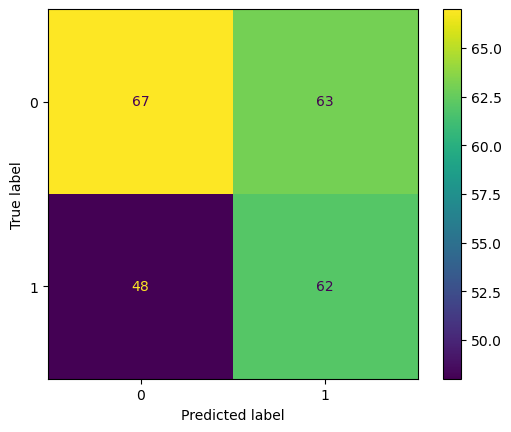

In [277]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_titanic = confusion_matrix(y_test,y_pred2)

#Hiển thị ma trân:
print('Confusion matrix - Practice:')
print(cnf_matrix_titanic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

In [278]:
df_practice.head()

,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,0,67,46,0,4,2.0,1
1,P2,0,43,66,1,0,2.0,1
2,P3,0,58,80,2,4,2.0,1
3,P4,0,28,51,1,0,2.0,0
4,P5,0,74,46,1,4,2.0,1


In [639]:
#Shape : 'Lobular' = 0 , 'Round' = 1, 'Irregular' = 2, 'Oval ' = 3
#Margin: Circumscribed = 0, Microlobulated = 1, Obscured = 2, ill-defined = 3, Spiculated=4
#Denstity: High = 0, ISO = 1, Low = 2, Fat - containing =3
age = 40
sex = 0
weight = 60
shape = 1
margin = 2 
denstity = 2

patient = np.array([age, sex, weight, shape, margin, denstity]).reshape(1, -1) # Reshape the array to be a 2D array
print("Thông tin bệnh nhân 1: ",patient)

Thông tin bệnh nhân 1:  [[40  0 60  1  2  2]]


In [641]:
pred_patient = KNN_practice2.predict(patient)
print(pred_patient)
if (pred_patient ==0):
    print("Bệnh nhân này mắc u lành tính")
else:
    print("Bệnh nhân này mắc u ác tính")

[0.]
Bệnh nhân này mắc u lành tính


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [281]:
#Shape : 'Lobular' = 0 , 'Round' = 1, 'Irregular' = 2, 'Oval ' = 3
#Margin: Circumscribed = 0, Microlobulated = 1, Obscured = 2, ill-defined = 3, Spiculated=4
#Denstity: High = 0, ISO = 1, Low = 2, Fat - containing =3
    
age = 64
sex = 0
weight = 75
shape = 1
margin = 0 
denstity = 0

patient1 = np.array([age, sex, weight, shape, margin, denstity]).reshape(1, -1) # Reshape the array to be a 2D array
print("Thông tin bệnh nhân 2: ",patient1)


Thông tin bệnh nhân 2:  [[64  0 75  1  0  0]]


In [282]:
print("___Kết quả___")

pred_patient1 = KNN_practice2.predict(patient1)
print(pred_patient1)
if (pred_patient ==0):
    print("Bệnh nhân này mắc u lành tính")
if (pred_patient ==1):
    print("Bệnh nhân này mắc u ác tính")

___Kết quả___
[0]
Bệnh nhân này mắc u lành tính


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Decision Tree 

In [571]:


df_practice1 = pd.read_excel("Data\Data_Practice_OK.xlsx")

df_practice1['PatientID'] = df_practice1['PatientID'].apply(lambda x: int(x[1:]) if isinstance(x, str) and x.startswith('P') else x)
#Loại bỏ P trong cột PaabstientID

df_practice1.head()


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,1,0,67,46,0,4,2,1
1,2,0,43,66,1,0,2,1
2,3,0,58,80,2,4,2,1
3,4,0,28,51,1,0,2,0
4,5,0,74,46,1,4,2,1


In [572]:
#Tách biến độc lập x và phụ thuộc y 

x = df_practice1.iloc[:,1:7]
print(x)

y = df_practice1.iloc[:,-1]
print(y)

     Sex  Age  Weight  Shape  Margin  Density
0      0   67      46      0       4        2
1      0   43      66      1       0        2
2      0   58      80      2       4        2
3      0   28      51      1       0        2
4      0   74      46      1       4        2
..   ...  ...     ...    ...     ...      ...
955    0   47      72      3       0        2
956    0   56      64      2       4        2
957    0   64      75      2       4        2
958    0   66      56      2       4        2
959    0   62      51      0       2        2

[960 rows x 6 columns]
0      1
1      1
2      1
3      0
4      1
      ..
955    0
956    1
957    0
958    1
959    0
Name: Target, Length: 960, dtype: int64


In [609]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeRegressor

#Khai báo mô hình: Sử dụng các tham số mặc định của mô hình

df_practice1 = DecisionTreeRegressor()

#Danh sách các tham số của mô hình
df_practice1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [610]:
#Tách dữ liệu thành 2 phần Train - Test: 70 - 30
#Gọi hàm tách dữ liệu train_test_split trong thư viện sklearn.model_selection:
from sklearn.model_selection import train_test_split

#Thực hiện tách theo tỷ lệ 70:30
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3, #Kích thước tập test
                                                   shuffle=True) #trộn dữ liệu lấy ngẫu nhiên

print('Tổng số mẫu dữ liệu   :', len(y))
print('Số mẫu trong tập Train:',len(y_train))
print('Số mẫu trong tập Test :',len(y_test))

Tổng số mẫu dữ liệu   : 960
Số mẫu trong tập Train: 672
Số mẫu trong tập Test : 288


In [611]:
df_practice1.fit(x_train, y_train)

DecisionTreeRegressor()

In [612]:
import numpy as np

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = df_practice1.score(x_train, y_train)
print("Độ chính xác trên tập huấn luyện: ", round(accuracy_train*100, 2))


Độ chính xác trên tập huấn luyện:  97.61


In [613]:
# Dự đoán nhãn trên tập huấn luyện
y_train_pred = df_practice1.predict(x_train)

# Tính tổng số mẫu dự đoán đúng
correct_predictions_train = sum(y_train_pred == y_train)

# In ra kết quả
print("Tổng số mẫu dự đoán đúng trên tập huấn luyện:", correct_predictions_train)

Tổng số mẫu dự đoán đúng trên tập huấn luyện: 656


In [614]:
#Đánh giá độ chính xác trên tập Kiểm tra:
 
accuracy_test = df_practice1.score(x_test, y_test)
print("Độ chính xác trên tập kiểm tra: ", round(accuracy_test*100,2))

Độ chính xác trên tập kiểm tra:  4.65


In [615]:
# Dự đoán nhãn trên tập kiểm tra
y_test_pred = df_practice1.predict(x_test)

# Tính tổng số mẫu dự đoán đúng
correct_predictions_test = sum(y_test_pred == y_test)

# In ra kết quả
print("Tổng số mẫu dự đoán đúng trên tập kiểm tra:", correct_predictions_test)

Tổng số mẫu dự đoán đúng trên tập kiểm tra: 217


In [616]:
# Sex	Age	Weight	Shape	Margin	Density
practice_names = ['Sex',
                 'Age',
                 'Weight',
                 'Shape',
                'Margin',
                'Density',]

target_names = ['1: U lành tính', '0: U ác tính']

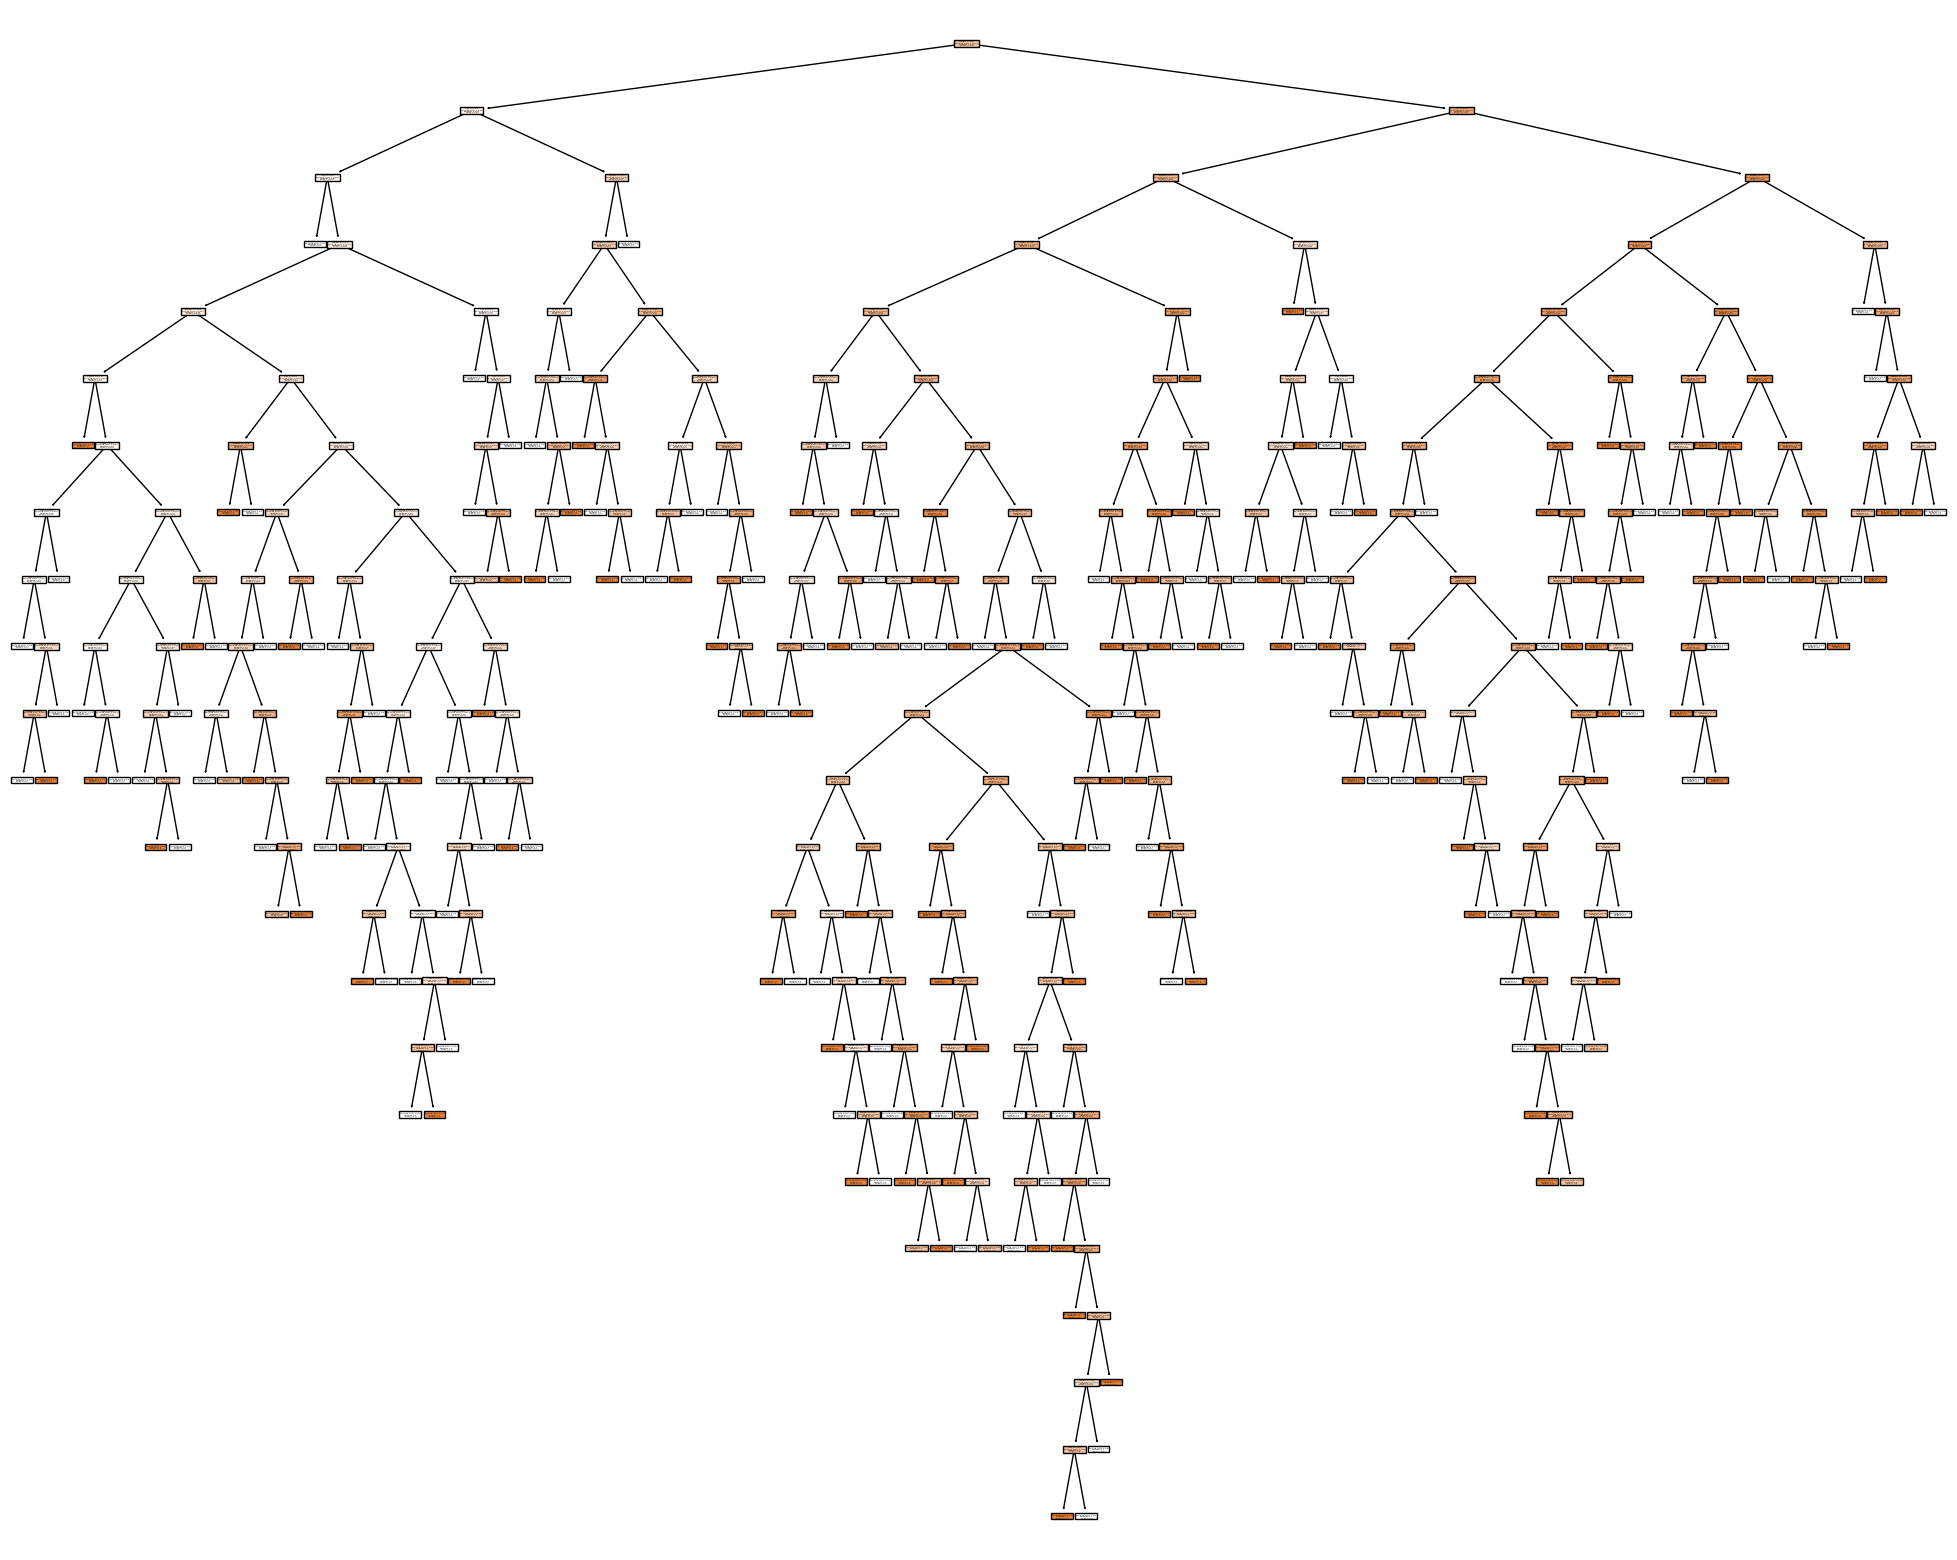

In [617]:
from sklearn import tree
import matplotlib.pyplot as plt

# Hiển thị cây quyết định
plt.figure(figsize=(25, 20))
tree.plot_tree(df_practice1, 
               filled=True, 
               feature_names=practice_names,
               class_names=target_names)
plt.show()


['Sex', 'Age', 'Weight', 'Shape', 'Margin', 'Density']
[0.         0.28522833 0.22159295 0.07416417 0.39952402 0.01949053]


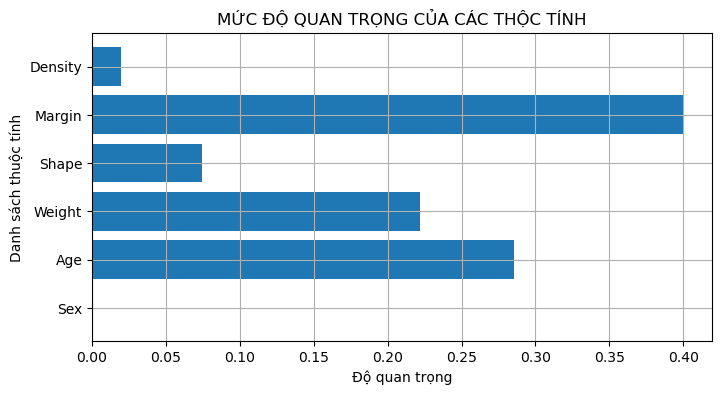

In [618]:
#Xác định mức độ quan trọng của từng thuộc tính:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(practice_names)
print(df_practice1.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(practice_names,df_practice1.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()


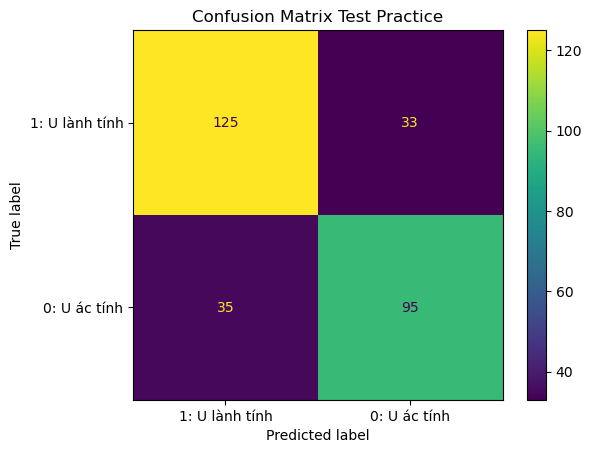

In [622]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred_discrete = (y_test_pred > 0.5).astype(int)

cnf_matrix_practice = confusion_matrix(y_test, y_test_pred_discrete)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_practice, display_labels=target_names)
disp.plot()
plt.title('Confusion Matrix Test Practice')
plt.show()


In [642]:
#Shape : 'Lobular' = 0 , 'Round' = 1, 'Irregular' = 2, 'Oval ' = 3
#Margin: Circumscribed = 0, Microlobulated = 1, Obscured = 2, ill-defined = 3, Spiculated=4
#Denstity: High = 0, ISO = 1, Low = 2, Fat - containing =3
age = 40
sex = 0
weight = 60
shape = 1
margin = 2
denstity = 2

patient_1 = np.array([age, sex, weight, shape, margin, denstity]).reshape(1, -1) 
print("Thông tin bệnh nhân 1: ",patient_1)

Thông tin bệnh nhân 1:  [[40  0 60  1  2  2]]


In [643]:
pred_patient = df_practice1.predict(patient_1)
print(pred_patient)
if (pred_patient ==0):
    print("Bệnh nhân này mắc u lành tính")
else:
    print("Bệnh nhân này mắc u ác tính")

[0.]
Bệnh nhân này mắc u lành tính


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [644]:
age = 64
sex = 0
weight = 70
shape = 1
margin = 0 
denstity = 1

patient_2 = np.array([age, sex, weight, shape, margin, denstity]).reshape(1, -1) 
print("Thông tin bệnh nhân 2: ",patient_2)

Thông tin bệnh nhân 2:  [[64  0 70  1  0  1]]


In [645]:
pred_patient = df_practice1.predict(patient_2)
print(pred_patient)
if (pred_patient ==0):
    print("Bệnh nhân này mắc u lành tính")
else:
    print("Bệnh nhân này mắc u ác tính")

[0.]
Bệnh nhân này mắc u lành tính


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
